In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
data = np.random.randn(1000)

In [5]:
data[:10]

array([ 0.08476251,  0.90575065, -1.19353378,  1.64976962, -0.06207831,
        0.56795237, -0.65695036,  1.25230419, -0.7592368 ,  1.74428464])

(array([  9.,  26., 106., 203., 218., 219., 136.,  65.,  15.,   3.]),
 array([-3.0219407 , -2.3800535 , -1.7381663 , -1.0962791 , -0.4543919 ,
         0.1874953 ,  0.8293825 ,  1.47126969,  2.11315689,  2.75504409,
         3.39693129]),
 <a list of 10 Patch objects>)

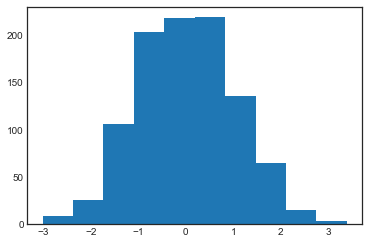

In [6]:
plt.hist(data)

(array([0.00934744, 0.01402116, 0.01869487, 0.02336859, 0.04673718,
        0.0514109 , 0.11216924, 0.19629617, 0.18694874, 0.28509682,
        0.30846541, 0.3552026 , 0.35052888, 0.331834  , 0.33650772,
        0.38324491, 0.35987632, 0.2804231 , 0.25705451, 0.23835964,
        0.14021155, 0.12151668, 0.11684296, 0.06543206, 0.03271603,
        0.01402116, 0.02336859, 0.00934744, 0.        , 0.00467372]),
 array([-3.0219407 , -2.8079783 , -2.5940159 , -2.3800535 , -2.1660911 ,
        -1.9521287 , -1.7381663 , -1.5242039 , -1.3102415 , -1.0962791 ,
        -0.8823167 , -0.6683543 , -0.4543919 , -0.2404295 , -0.0264671 ,
         0.1874953 ,  0.4014577 ,  0.6154201 ,  0.8293825 ,  1.0433449 ,
         1.2573073 ,  1.47126969,  1.68523209,  1.89919449,  2.11315689,
         2.32711929,  2.54108169,  2.75504409,  2.96900649,  3.18296889,
         3.39693129]),
 <a list of 1 Patch objects>)

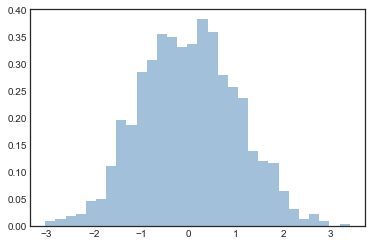

In [10]:
plt.hist(data, bins=30, density=True, alpha=0.5, histtype='stepfilled',
        color = 'steelblue', edgecolor='none')

(array([0.00518211, 0.00518211, 0.00777316, 0.00777316, 0.01813738,
        0.02072843, 0.0336837 , 0.0673674 , 0.04404791, 0.09586899,
        0.10623321, 0.08291372, 0.16064534, 0.18137377, 0.19692009,
        0.2357859 , 0.19692009, 0.19432904, 0.21246641, 0.1684185 ,
        0.15028112, 0.11141531, 0.08809583, 0.05700318, 0.04404791,
        0.02850159, 0.01813738, 0.01554632, 0.01554632, 0.01036422,
        0.00518211, 0.        , 0.00259105, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.00259105]),
 array([-3.22970884, -2.84376549, -2.45782213, -2.07187878, -1.68593542,
        -1.29999207, -0.91404871, -0.52810536, -0.142162  ,  0.24378136,
         0.62972471,  1.01566807,  1.40161142,  1.78755478,  2.17349813,
         2.55944149,  2.94538484,  3.3313282 ,  3.71727155,  4.10321491,
         4.48915826,  4.87510162,  5.26104497,  5.64698833,  6.03293169,
         6.41887504,  6.8048184 ,  7.19076175,  7.57670511,  7.96264846,
         8.34859

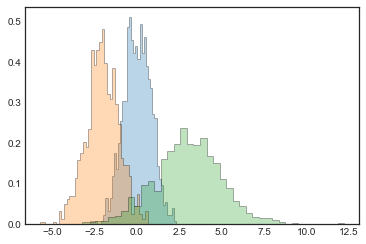

In [17]:
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40, edgecolor='black', linewidth = 1)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

In [18]:
counts, bin_edges = np.histogram(data, bins=5)
print(counts)

[ 35 309 437 201  18]


In [19]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T

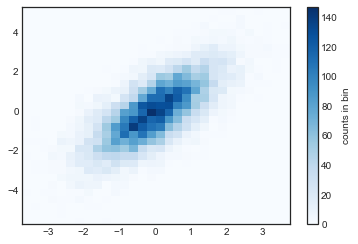

In [39]:
plt.hist2d(x, y, bins=30, cmap='Blues')
#plt.grid(which='both', color='black', linestyle='-', linewidth=2, alpha=1)

cb = plt.colorbar()
cb.set_label('counts in bin') #колличество в интервале

In [40]:
counts, xedges, yedges = np.histogram2d(x, y, bins=30)

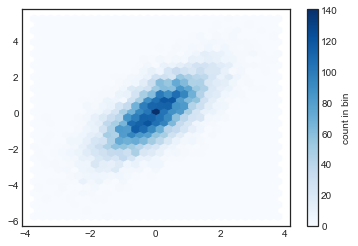

In [47]:
plt.hexbin(x, y, gridsize=30, cmap='Blues')
cb = plt.colorbar(label='count in bin') #колличество в интервале

In [48]:
x[:10]

array([-1.42090235,  0.00228247, -1.68339901,  0.15337597,  1.36846085,
        0.06381646,  0.97492995,  0.55265924, -0.83669196,  0.65300888])

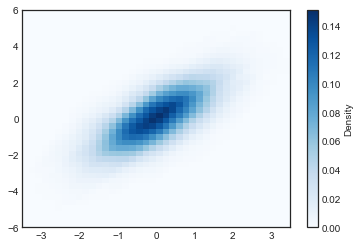

In [51]:
from scipy.stats import gaussian_kde

#выполняем подбор на массиве размера [Ndim, Nsamples]
data = np.vstack([x, y])
kde = gaussian_kde(data)

#вычисляем на регулярной координатной сетке
xgrid = np.linspace(-3.5, 3.5, 40)
ygrid = np.linspace(-6, 6, 40)
Xgrid, Ygrid = np.meshgrid(xgrid, ygrid)
Z = kde.evaluate(np.vstack([Xgrid.ravel(), Ygrid.ravel()]))

#выводим график результата
plt.imshow(Z.reshape(Xgrid.shape),
          origin='lower', aspect='auto',
          extent=[-3.5, 3.5, -6, 6],
          cmap='Blues')
cb = plt.colorbar()
cb.set_label("Density") #плотность